In [ ]:
from cfg.default import cfg

#print(cfg)

cfg_exp = 'cfg/kinetics400/0.yml'
cfg.merge_from_file(cfg_exp)
cfg.freeze()
#print(cfg)
run_type = 0  ## 0:train / 1:test
DSTXT = cfg.DS.kinetics400_txt[run_type]
print(DSTXT)

videos = list(open(DSTXT))
#for v in videos:print(v)
videos = [ v.strip("\n").split(" ")[0] for v in videos]
#print(videos[400])

In [ ]:
#import sys, os
#sys.path.insert(0, os.path.abspath('../python'))
import decord as de

In [ ]:
# using cpu in this example
ctx = de.cpu(0)

shape = (8, 480, 640, 3)
videos = videos[32000:32010]
interval = 5 ## amount of frames to jump in-batch
# using inter-batch frame interval 20, which means batch-batch interval is 20
skip = 10   ## amount of frames to jump betwen batchs

In [ ]:
# first see how sequential read looks like
vl = de.VideoLoader(videos, ctx=ctx, shape=shape, interval=interval, skip=skip, shuffle=0)
print('num batches:', len(vl))

In [ ]:
def disp_batches(video_loader, max_disp=5):
    from matplotlib import pyplot as plt
    import matplotlib.gridspec as gridspec
    cnt = 0
    vl.reset()
    for batch in vl:
        if cnt >= max_disp:
            break
        print('batch data shape:', batch[0].shape)
        print('indices:', ', '.join(['(file: {} frame: {})'.format(x, y) for x, y in batch[1].asnumpy()]))
        print('----------')
        data = batch[0].asnumpy()
        columns = 4
        rows = max(1, (data.shape[0] + 1) // columns)
        fig = plt.figure(figsize = (32,(16 // columns) * rows))
        gs = gridspec.GridSpec(rows, columns)
        for i in range(data.shape[0]):
            plt.subplot(gs[i])
            plt.axis("off")
            plt.imshow(data[i])
        cnt += 1
disp_batches(vl, 10)

So video loader smoothly loaded batches from two videos, and let's shuffle the scenes

In [ ]:
vl = de.VideoLoader(videos, ctx=ctx, shape=shape, interval=interval, skip=skip, shuffle=1)
print('num batches:', len(vl))
disp_batches(vl, 10)

#### single debug

In [4]:
import decord as de
ctx = de.cpu(0)

path = '/media/jtstudents/T77/kinetics400/videos_train/cracking_neck/13pZJ_w0R88.mp4'
vr = de.VideoReader(path, ctx=ctx)
print('vr:', len(vr))
for i in range(len(vr)):
    frame = vr[i]
    print(frame.shape)


with open(path, 'rb') as f:
  vr2 = de.VideoReader(f, ctx)
print('vr2:', len(vr2))




vr: 55
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
(320, 568, 3)
vr2: 55


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

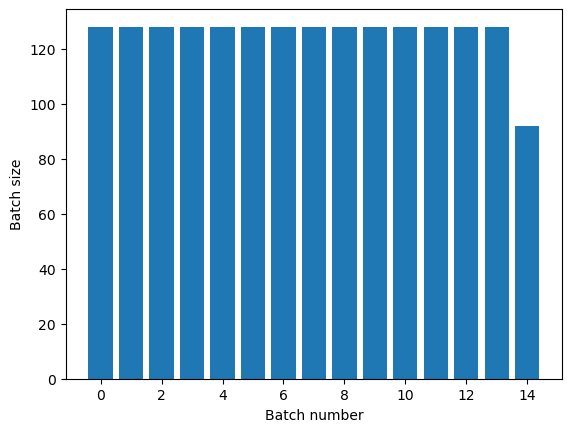

In [4]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)


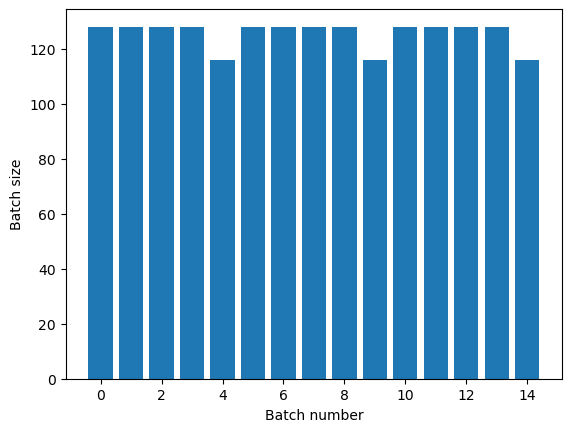

In [5]:
titanic_batches = titanic_lines.batch(128).repeat(3)
plot_batch_sizes(titanic_batches)


In [6]:
epochs = 3
dataset = titanic_lines.batch(128)

for epoch in range(epochs):
  for batch in dataset:
    print(batch.shape)
  print("End of epoch: ", epoch)


(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2
